# SF Salaries Exercise 



# **Load Necessary libraries**

In [210]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# ** Read Salaries.csv as a dataframe called sal.**

In [211]:
data=pd.read_csv('Salaries.csv')


# ** Check the head of the DataFrame. **

In [293]:
data.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [213]:
# Check nan values
data.isna().sum()

Id                       0
EmployeeName             0
JobTitle                 0
BasePay                609
OvertimePay              4
OtherPay                 4
Benefits             36163
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
Status              148654
dtype: int64

In [214]:
#total reords , rows and columns
data.shape

(148654, 13)

In [215]:
#check feature names
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   EmployeeName      148654 non-null  object 
 2   JobTitle          148654 non-null  object 
 3   BasePay           148045 non-null  float64
 4   OvertimePay       148650 non-null  float64
 5   OtherPay          148650 non-null  float64
 6   Benefits          112491 non-null  float64
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  int64  
 10  Notes             0 non-null       float64
 11  Agency            148654 non-null  object 
 12  Status            0 non-null       float64
dtypes: float64(8), int64(2), object(3)
memory usage: 14.7+ MB


In [216]:
#drop Notes and Status columns
n=data.drop(columns=['Notes','Status'])
data[:2]

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN


In [217]:
#check new shape
n.shape

(148654, 11)

In [218]:
#check columns
n.columns

Index(['Id', 'EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year', 'Agency'],
      dtype='object')

In [219]:
#fill BasePay NaN by using some technique
b=data['BasePay'].fillna(0)
b.isnull().sum()


0

# **What is the average BasePay ?**

In [220]:
b.mean()

66053.72928807836

# ** What is the highest amount of OvertimePay in the dataset ? **

In [297]:
data['OvertimePay'].max()

245131.88

## Fetch record of Highest paid employee

In [300]:
data[data['TotalPay']==data['TotalPay'].max()]

# fetch highest 5 record
#data.nlargest(5,'TotalPay')

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN


## Fetch name of highest Overtime pay employee


In [223]:
data[data['OvertimePay']==data['OvertimePay'].max()]

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN


# ** What is the job title of  JOSEPH DRISCOLL ? Note: Use all caps, otherwise you may get an answer that doesn't match up (there is also a lowercase Joseph Driscoll). **

In [ ]:
data[data['EmployeeName']=='JOSEPH DRISCOLL']['JobTitle'].values[0]

'CAPTAIN, FIRE SUPPRESSION'

# ** How much does JOSEPH DRISCOLL make (including benefits)? **

In [285]:
joseplh_sal=data[data['EmployeeName']=='JOSEPH DRISCOLL']['Benefits']
print(f"JOSEPH DRISCOLL make (including benefits):{joseplh_sal.values[0]}")

JOSEPH DRISCOLL make (including benefits):nan


# ** What is the name, Job title of highest paid person (including benefits)?**

In [277]:
data.loc[data['Benefits'].idxmax()]

Id                                    110534
EmployeeName            William J Coaker Jr.
JobTitle            Chief Investment Officer
BasePay                             257340.0
OvertimePay                              0.0
OtherPay                             82313.7
Benefits                            96570.66
TotalPay                            339653.7
TotalPayBenefits                   436224.36
Year                                    2014
Notes                                    NaN
Agency                         San Francisco
Status                                   NaN
Name: 110533, dtype: object

# ** What is the name of lowest paid person (including benefits)? Do you notice something strange about how much he or she is paid?**

In [276]:
data.loc[data["Benefits"].idxmin()]

Id                            110531
EmployeeName           David P Kucia
JobTitle            Police Officer 3
BasePay                          NaN
OvertimePay                      0.0
OtherPay                         0.0
Benefits                      -33.89
TotalPay                         0.0
TotalPayBenefits              -33.89
Year                            2013
Notes                            NaN
Agency                 San Francisco
Status                           NaN
Name: 110530, dtype: object

## Show me the records with totalpaybenefit less than or equal to 0


In [239]:
data[data['TotalPayBenefits']<=0].head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
36156,36157,PAULETTE ADAMS,"STATIONARY ENGINEER, WATER TREATMENT PLANT",0.0,0.0,0.0,NaN,0.0,0.00,2011,NaN,San Francisco,NaN
36157,36158,KAUKAB MOHSIN,TRANSIT OPERATOR,0.0,0.0,0.0,NaN,0.0,0.00,2011,NaN,San Francisco,NaN
36158,36159,JOSEPHINE MCCREARY,MANAGER IV,0.0,0.0,0.0,NaN,0.0,0.00,2011,NaN,San Francisco,NaN
110528,110529,Timothy E Gibson,Police Officer 3,NaN,0.0,0.0,-2.73,0.0,-2.73,2013,NaN,San Francisco,NaN
110529,110530,Mark E Laherty,Police Officer 3,NaN,0.0,0.0,-8.20,0.0,-8.20,2013,NaN,San Francisco,NaN


# ** What was the average (mean) BasePay of all employees per year? (2011-2014) ? **

In [236]:
# Yearwise Average BasePay
yearwise=data.groupby("Year")["BasePay"].mean()
yearwise.loc[2011:2014]

Year
2011    63595.956517
2012    65436.406857
2013    69630.030216
2014    66564.421924
Name: BasePay, dtype: float64

# ** How many unique job titles are there? **

In [ ]:
data['JobTitle'].unique().size
#len(data['JobTitle'].unique())

2159

# ** What are the top 5 most common jobs? **

In [89]:
data['JobTitle'].value_counts().head()

JobTitle
Transit Operator                7036
Special Nurse                   4389
Registered Nurse                3736
Public Svc Aide-Public Works    2518
Police Officer 3                2421
Name: count, dtype: int64

In [88]:
# last five
data['JobTitle'].value_counts().tail()

JobTitle
CHIEF HOUSING INSPECTOR                           1
TRAFFIC SIGNAL OPERATOR                           1
COURT COMPUTER FACILITIES COORDINATOR             1
AUTOMOTIVE BODY AND FENDER WORKER SUPERVISOR I    1
VICTIM & WITNESS TECHNICIAN                       1
Name: count, dtype: int64

# How many are there those work as a POLICE OFFICER III

In [104]:
data[data['JobTitle']=='Police Officer 3'].shape[0]

2421

# In which department we have least employees?

In [ ]:
#data[data['JobTitle']=='ACCOUNT CLERK'].shape[0]   -->
data['JobTitle'].min()


'ACCOUNT CLERK'

# Fetch record of year 2011 where Basepay 200000

In [147]:
data[(data["Year"] == 2011) & (data["BasePay"] == 200000)] # not available any record 

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status


# How much average basepay is given to employees inthe year 2013

In [153]:
data[data['Year']==2013]['BasePay'].mean()

69630.03021648065

# Plot.the % distribustion of Yearwise TotalPay

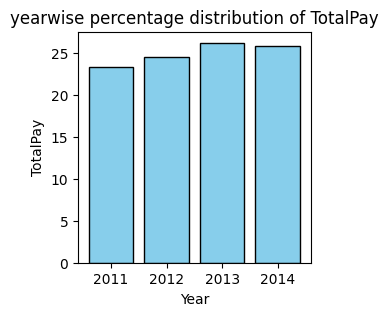

In [171]:
yearwise=data.groupby('Year')['TotalPay'].sum()
#yearwise
yearwise_per=(yearwise/yearwise.sum())*100
#yearwise_per
plt.figure(figsize=(3,3))
plt.bar(yearwise_per.index,yearwise_per,color='skyblue',edgecolor='black')
plt.xlabel('Year')
plt.ylabel('TotalPay')
plt.title('yearwise percentage distribution of TotalPay')

plt.show()

# How many employees getting 0 overtimePay?

In [191]:
data[data['OvertimePay']==0].shape[0]

77321

## Load data from Github

In [ ]:
url = "https://raw.githubusercontent.com/YBI-Foundation/Dataset/main/Salary%20Data.csv"
data = pd.read_csv(url)
data.head()

,Experience Years,Salary
0,1.1,39343
1,1.2,42774
2,1.3,46205
3,1.5,37731
4,2.0,43525
